In [7]:
data = pd.read_csv(r'.\DATA\videos_preprocessed\겁도 없꾸라_겁도 없꾸라_20230411.csv')
data.columns
columns = ['category_id', 'duration', 'update_diff', 'views_scaled', 'likes_scaled', 'view_per_minutes','time_gap_minutes']

# Select the columns you need for the LSTM model
# columns = ['category_id', 'duration', 'date_diff', 'view_per_time', 'likes_per_first', 'likes_per_view', 'view_per_first']
# data = data[columns]

Index(['Unnamed: 0', 'id', 'title', 'category_id', 'views', 'likes',
       'favorites', 'comments', 'date', 'date_gap', 'duration', 'tags',
       'views_scaled', 'likes_scaled', 'update_diff', 'time_gap_minutes',
       'view_per_minutes'],
      dtype='object')

In [39]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense
import os
import random

In [13]:
# Convert the data to a 2D array for training the LSTM model
def prepare_data(data, n_steps, threshold):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix >= len(data):
            break
        # only consider rows where the date_gap is less than the threshold
        if data.loc[end_ix, 'time_gap_minutes'] < threshold:
            # extract the input and output sequences
            seq_X, seq_y = data.iloc[i:end_ix, :-1].values, data.loc[end_ix, ['views_scaled','view_per_minutes']]
            X.append(seq_X)
            y.append(seq_y)
    return np.array(X), np.array(y)

In [37]:
def generate_batches(X, y, batch_size):
    num_batches = X.shape[0] // batch_size
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        yield X[start_idx:end_idx], y[start_idx:end_idx]

In [14]:
#shuffle for data split, 

directory = 'DATA/videos_preprocessed'
filenames= os.listdir(directory)
series_dict = {}

# Group the list elements by series
for file in filenames:
    series_name = file.split('_')[1]  # Extract the series name
    if series_name not in series_dict:
        series_dict[series_name] = []
    series_dict[series_name].append(file)

# Shuffle the order of the series
series_list = list(series_dict.keys())
random.shuffle(series_list)

# Concatenate the shuffled series
shuffled_lst = []
for series_name in series_list:
    shuffled_lst += series_dict[series_name]

#result aht contatins shuffled filenames
shuffled_lst


['WIRED_Autocomplete Interview_20230411.csv',
 'WIRED_Autocomplete Interview_20230412.csv',
 'WIRED_Autocomplete Interview_20230416.csv',
 '르세라핌_LENIVERSE_20230411.csv',
 '르세라핌_LENIVERSE_20230412.csv',
 '르세라핌_LENIVERSE_20230416.csv',
 '낄낄상회_가졳같은회사_20230411.csv',
 '낄낄상회_가졳같은회사_20230412.csv',
 '낄낄상회_가졳같은회사_20230416.csv',
 '시즌비시즌_시즌3_20230411.csv',
 '시즌비시즌_시즌3_20230412.csv',
 '시즌비시즌_시즌3_20230416.csv',
 '하나은행_돈을말하다_20230411.csv',
 '하나은행_돈을말하다_20230412.csv',
 '하나은행_돈을말하다_20230416.csv',
 '김지윤의 지식play_국제정치_20230411.csv',
 '김지윤의 지식play_국제정치_20230412.csv',
 '김지윤의 지식play_국제정치_20230416.csv',
 '강형욱의 보듬TV_견종백과_20230411.csv',
 '강형욱의 보듬TV_견종백과_20230412.csv',
 '강형욱의 보듬TV_견종백과_20230416.csv',
 '스낵타운_엘프타운_20230411.csv',
 '스낵타운_엘프타운_20230412.csv',
 '스낵타운_엘프타운_20230416.csv',
 '하이틴에이저_웹드라마_20230411.csv',
 '하이틴에이저_웹드라마_20230412.csv',
 '하이틴에이저_웹드라마_20230416.csv',
 'OOTB_전과자_20230411.csv',
 'OOTB_전과자_20230412.csv',
 'OOTB_전과자_20230416.csv',
 '용진호건강원_용진호건강원_20230411.csv',
 '용진호건강원_용진호건강원_20230412.csv',
 '용진호건강원

In [22]:
a = np.zeros((1,3,6))
b = np.zeros((1,2))
a.shape[1:3]

(3, 6)

In [31]:
# set the directory path containing the CSV files
directory = 'DATA/videos_preprocessed'
columns = ['category_id', 'duration', 'update_diff', 'views_scaled', 'likes_scaled', 'view_per_minutes','time_gap_minutes']

# set the desired n_steps and threshold values
n_steps = 3
threshold = 43200
initX, inity = np.zeros((1,3,6)), np.zeros((1,2))
X = np.zeros((1,3,6))
y = np.zeros((1,2))

# iterate over the files in the directory
for filename in shuffled_lst:
    # load the CSV file
    filepath = os.path.join(directory, filename)
    data = pd.read_csv(filepath)
    data = data[columns]
        
    # prepare the data using the prepare_data() function
    tmpX, tmpy = prepare_data(data, n_steps=n_steps, threshold=threshold)
    # print(f"{filename}, x: {X.shape}, tmpx: {tmpX.shape}")
    if not np.array_equal(X,initX):
        if (tmpX.shape[1:3] == X.shape[1:3]):
            X = np.concatenate((X,tmpX),axis=0)
            y = np.concatenate((y,tmpy),axis=0)
    else:
        X = tmpX
        y = tmpy
        
    print(f'Prepared data for file {filename}: X shape = {X.shape}, y shape = {y.shape}')

Prepared data for file WIRED_Autocomplete Interview_20230411.csv: X shape = (3, 3, 6), y shape = (3, 2)
Prepared data for file WIRED_Autocomplete Interview_20230412.csv: X shape = (6, 3, 6), y shape = (6, 2)
Prepared data for file WIRED_Autocomplete Interview_20230416.csv: X shape = (10, 3, 6), y shape = (10, 2)
Prepared data for file 르세라핌_LENIVERSE_20230411.csv: X shape = (12, 3, 6), y shape = (12, 2)
Prepared data for file 르세라핌_LENIVERSE_20230412.csv: X shape = (14, 3, 6), y shape = (14, 2)
Prepared data for file 르세라핌_LENIVERSE_20230416.csv: X shape = (17, 3, 6), y shape = (17, 2)
Prepared data for file 낄낄상회_가졳같은회사_20230411.csv: X shape = (19, 3, 6), y shape = (19, 2)
Prepared data for file 낄낄상회_가졳같은회사_20230412.csv: X shape = (21, 3, 6), y shape = (21, 2)
Prepared data for file 낄낄상회_가졳같은회사_20230416.csv: X shape = (23, 3, 6), y shape = (23, 2)
Prepared data for file 시즌비시즌_시즌3_20230411.csv: X shape = (24, 3, 6), y shape = (24, 2)
Prepared data for file 시즌비시즌_시즌3_20230412.csv: X shape =

In [40]:
# Split the data into training and testing sets
split_idx = int(len(X) * 0.8) # 80% of the data will be used for training
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
for epoch in range(10):
    for X_batch, y_batch in generate_batches(X_train, y_train, 32):
        with tf.GradientTape() as tape:
            # Make predictions on the batch
            y_pred = model(X_batch)

            # Compute the loss
            loss = tf.keras.losses.mean_squared_error(tf.reduce_mean(y_batch, axis=1), tf.reduce_mean(y_pred, axis=1))

        # Compute the gradients
        grads = tape.gradient(loss, model.trainable_variables)

        # Update the weights
        tf.keras.optimizer.apply_gradients(zip(grads, model.trainable_variables))

InvalidArgumentError: {{function_node __wrapped__SquaredDifference_device_/job:localhost/replica:0/task:0/device:CPU:0}} Incompatible shapes: [32,2] vs. [32] [Op:SquaredDifference]

In [ ]:
X_train[2]

array([[[ 1.90000000e+01,  1.49000000e+03,  0.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  1.67719971e+01],
        [ 1.90000000e+01,  1.51400000e+03,  1.67919444e+02,
          4.35500302e-01,  3.84318243e-01,  2.43411980e+01],
        [ 1.90000000e+01,  1.97300000e+03,  1.67003611e+02,
          7.05338817e-01,  2.43087558e-01,  3.33811889e+01]],

       [[ 1.90000000e+01,  1.51400000e+03,  1.67919444e+02,
          4.35500302e-01,  3.84318243e-01,  2.43411980e+01],
        [ 1.90000000e+01,  1.97300000e+03,  1.67003611e+02,
          7.05338817e-01,  2.43087558e-01,  3.33811889e+01],
        [ 1.90000000e+01,  1.27100000e+03,  1.90996944e+02,
         -8.95402581e-01, -8.26104635e-01,  1.85142726e+01]]])

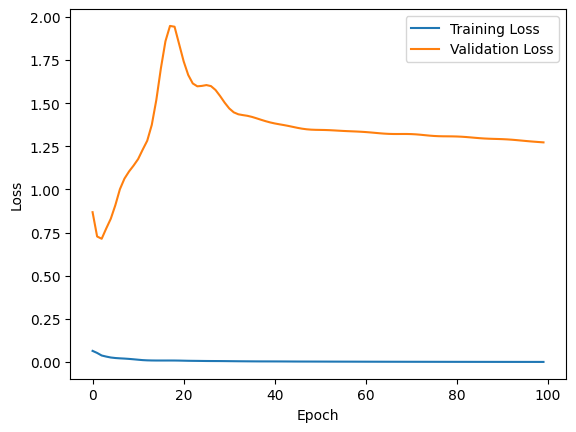

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Define the directory where the CSV files are stored
directory =  r".\DATA\videos_preprocessed"

# Define a list of columns to use for training the LSTM model
columns = ['category_id', 'duration', 'views_scaled', 'likes_scaled', 'update_diff', 'view_per_minutes']

# Load all the CSV files into a single pandas dataframe
df_list = []
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, usecols=columns)
        df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

# Split the data into training and testing sets (70-30 split)
train_size = int(len(df) * 0.7)
train_df = df[:train_size].reset_index(drop=True)
test_df = df[train_size:].reset_index(drop=True)

# Define the number of time steps and features for the LSTM model
n_steps = 3  # Number of time steps to use
n_features = 4  # Number of input features (excluding target columns)

# Create the training and testing data for the LSTM model
X_train = []
y_train = []
for i in range(n_steps, len(train_df)):
    X_train.append(train_df.iloc[i-n_steps:i, 1:].values)
    y_train.append(train_df.iloc[i, 2:4].values)
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(n_steps, len(test_df)):
    X_test.append(test_df.iloc[i-n_steps:i, 1:].values)
    y_test.append(test_df.iloc[i, 2:4].values)
X_test, y_test = np.array(X_test), np.array(y_test)

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(2))
model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the LSTM model on the testing data
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score)

# Make predictions on the testing data using the LSTM model
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values back to their original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

# Print the predictions and actual values for the 'view_scaled' and 'view_per_minutes' columns
print('Predictions for view_scaled:', y_pred[:,0])
print('Actual values for view_scaled:', y_test[:,0])
print('Predictions for view_per_minutes:', y_pred[:,1])
print('Actual values for view_per_minutes:', y_test[:,1])

ValueError: Usecols do not match columns, columns expected but not found: ['view_scaled']